In [103]:
from sklearn import linear_model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from pandas.plotting import autocorrelation_plot

### Time Series Analysis

In [74]:
df_deploy = pd.read_csv("./deploymentTime.csv")

In [75]:
df_deploy.head()

,epoch,ts,cpu,gpu1,gpu2
0,1578450656,2020-01-07 18:30:56,6.741983,7.174839,9.463056
1,1578450748,2020-01-07 18:32:28,6.433090,6.586499,9.773075
2,1578450848,2020-01-07 18:34:08,6.406432,6.436442,18.477036
3,1578450976,2020-01-07 18:36:16,6.458927,6.437795,45.621880
4,1578451082,2020-01-07 18:38:02,6.414540,6.433022,24.498318


In [104]:
def autoregress(runtime):
    df_cpu_deploy = df_deploy[['ts', runtime]].set_index('ts')[runtime]
    df_cpu_deploy.head()
    autocorrelation_plot(df_cpu_deploy)

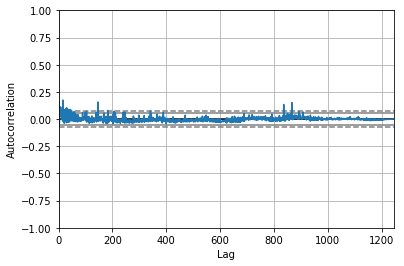

In [105]:
autoregress('cpu')

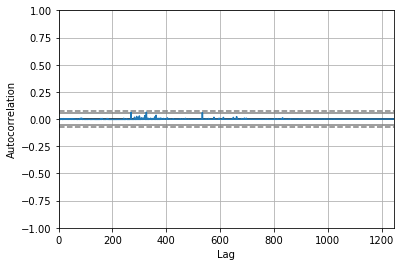

In [106]:
autoregress('gpu1')

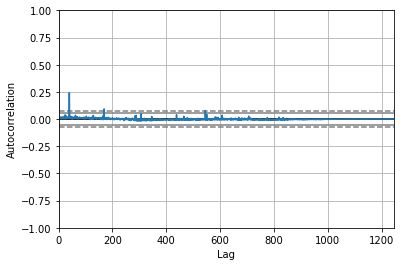

In [107]:
autoregress('gpu2')

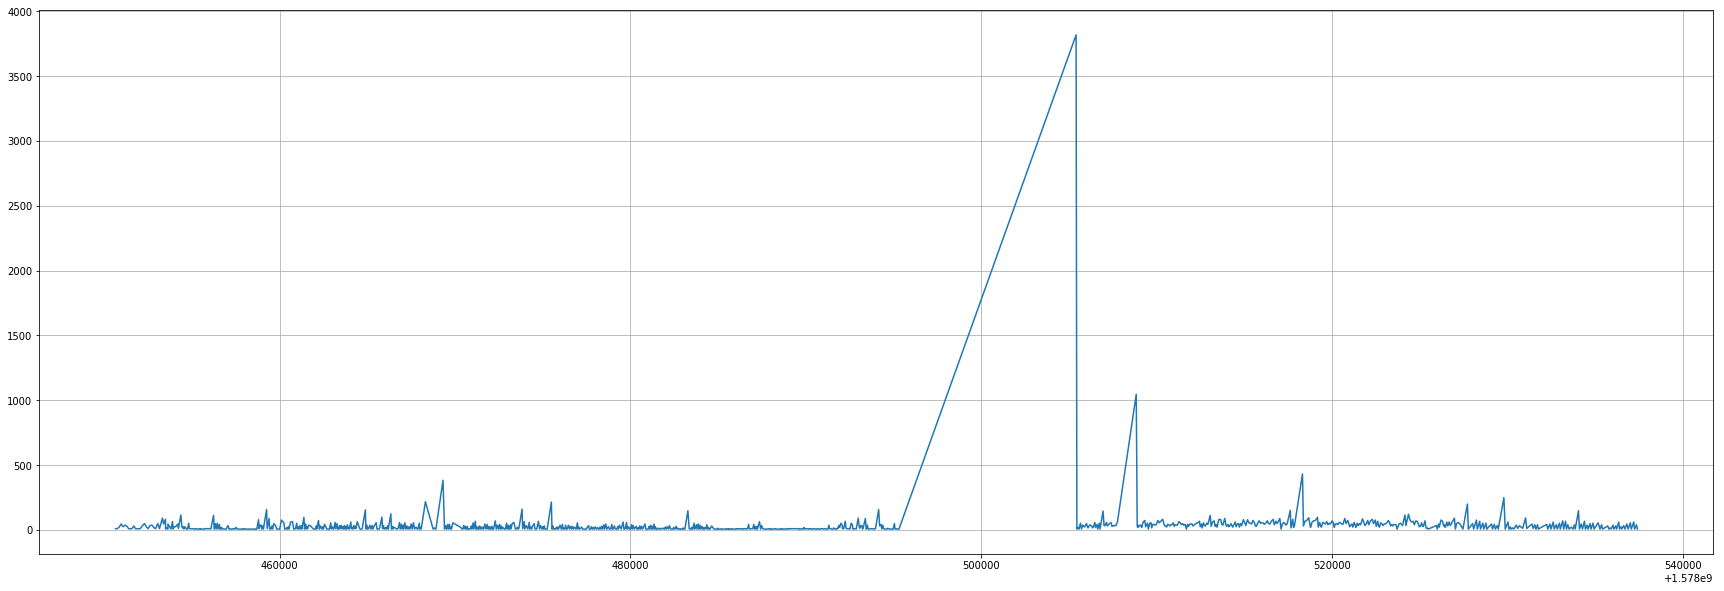

In [71]:
fig = plt.figure(figsize=(30, 10))
ax = fig.add_subplot(111)
ax.plot(df_deploy['epoch'], df_deploy['gpu2'])
ax.grid()

In [ ]:
lag_plot(df)

In [5]:
df_logtime = pd.read_csv("./logTime.csv")

In [6]:
df_logtime.head()

,epoch,image_num,runtime,pred_total,pred_transfer,pred_deploy,pred_proc,act_total,act_transfer,act_deploy,act_proc
0,1578450715,33,edge,94.537888,1.885893,0.000000,92.651993,70.275116,1.885893,0.000000,70.275116
1,1578450743,10,edge,21.790455,0.494965,0.000000,21.295490,22.239460,0.494965,0.000000,22.239460
2,1578450863,33,cpu,67.301781,1.633384,6.741983,58.926411,86.213676,1.633384,33.590122,52.623554
3,1578450904,10,cpu,22.968664,0.494965,6.527168,15.946531,18.691763,0.494965,6.470972,12.220791
4,1578451112,33,gpu1,47.325912,1.633384,6.732593,38.959934,104.747849,1.633384,51.749138,52.998711


In [62]:
df_pe = pd.DataFrame({"epoch": df_logtime['epoch'], "image_num": df_logtime['image_num'], "runtime": df_logtime['runtime'],
                       "pe_total" : (df_logtime['act_total'] - df_logtime['pred_total'])/df_logtime['act_total'], 
                       "pe_transfer" : (df_logtime['act_transfer'] - df_logtime['pred_transfer'])/df_logtime['act_transfer'], 
                       "pe_deploy" : (df_logtime['act_deploy'] - df_logtime['pred_deploy'])/df_logtime['act_deploy'],
                       "pe_proc" : (df_logtime['act_proc'] - df_logtime['pred_proc'])/df_logtime['act_proc']})

In [64]:
df_mpe = pd.DataFrame({"mpe_total": df_pe["pe_total"].mean(), "mpe_transfer": df_pe['pe_transfer'].mean(), 
                       "mpe_deploy": df_pe["pe_deploy"].mean(), "mpe_proc": df_pe["pe_proc"].mean()}, index=[0])

### Mean Percentage Error

In [66]:
# Mean Percentage Error
df_mpe

,mpe_total,mpe_transfer,mpe_deploy,mpe_proc
0,-0.483446,5.316152e-13,-1.964719,-0.005967


In [51]:
df_mae = pd.DataFrame({'mae_total': abs(df_logtime["act_total"] - df_logtime["pred_total"]).mean(), 
                       'mae_transfer': abs(df_logtime["act_transfer"] - df_logtime["pred_transfer"]).mean(), 
                       "mae_deploy": abs(df_logtime["act_deploy"] - df_logtime["pred_deploy"]).mean(), 
                       "mae_proc": abs(df_logtime["act_proc"] - df_logtime["pred_proc"]).mean()}, index=[0])

### Mean Absolute Error

In [52]:
df_mae

,mae_total,mae_transfer,mae_deploy,mae_proc
0,13.899921,2.162601e-11,10.845259,1.781663


In [58]:
df_mse = pd.DataFrame({"mse_total": ((df_logtime["act_total"] - df_logtime["pred_total"])**2).mean(), 
                       "mse_transfer": ((df_logtime["act_transfer"] - df_logtime["pred_transfer"])**2).mean(),
                       "mse_deploy": ((df_logtime["act_deploy"] - df_logtime["pred_deploy"])**2).mean(), 
                       "mse_proc": ((df_logtime["act_proc"] - df_logtime["pred_proc"])**2).mean()}, index=[0])

### Mean Square Error

In [59]:
df_mse

,mse_total,mse_transfer,mse_deploy,mse_proc
0,316.139132,8.088897e-22,224.443791,20.383685
